<a href="https://colab.research.google.com/github/ylmgrbzz/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Noise_Cancellation_with_Autocodes_Encoded_Decoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [9]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.reshape (x_train, (len(x_train), 28, 28, 1))
x_test =  np.reshape (x_test, (len(x_test), 28, 28, 1))

In [10]:
print('Eğtiim',x_train.shape)
print('Test', x_test.shape)

Eğtiim (60000, 28, 28, 1)
Test (10000, 28, 28, 1)


In [12]:
noise_factor=0.5

In [13]:
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0. ,1.)
x_test_noisy = np.clip(x_test_noisy, 0. ,1.)

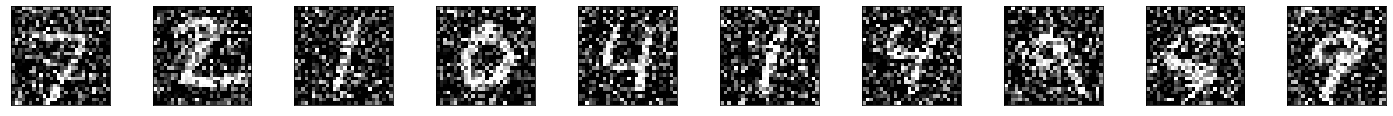

In [14]:

n = 10

plt.figure(figsize = (25,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
input_img = Input(shape = (28, 28, 1))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)

x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2,2), padding='same')(x)

In [19]:
x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)

x = UpSampling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)

x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

In [20]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [21]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/10
469/469 [==============================] - 13s 9ms/step - loss: 0.6945 - val_loss: 0.6795
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.6618 - val_loss: 0.6417
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6104 - val_loss: 0.5747
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5390 - val_loss: 0.5178
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5067 - val_loss: 0.5045
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4966 - val_loss: 0.4960
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4884 - val_loss: 0.4880
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4804 - val_loss: 0.4799
Epoch 9/10
469/469 [==============================] - 4s 7ms/step - loss: 0.4720 - val_loss: 0.4707
Epoch 10/10
469/469 [==============================] - 4s 7ms/step - loss: 0.4625 - val_loss: 0.460

In [22]:
decoded_imgs = autoencoder.predict(x_test)


313/313 [==============================] - 1s 2ms/step


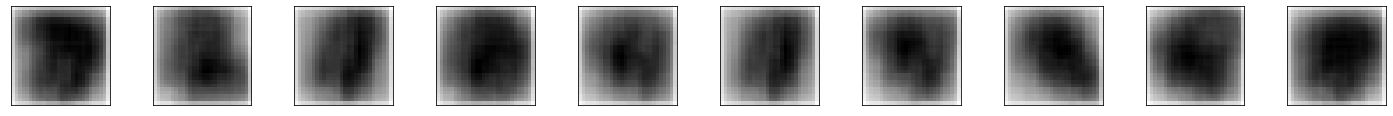

In [26]:
%matplotlib inline
n=10

plt.figure(figsize=(25,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
  